<font color = 'orange'>

# Multiple Regression

</font>

- to explore linear relationships between GPA and various dependent variables
- fit a linear regression model that predicts GPA given an input of multiple independent variables
- test the model's performance with a test dataset not used during training

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# load dataset
students = pd.read_csv('data/student_performance_data.csv')
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
# retrieve shape of dataset
students.shape

(2392, 15)

In [6]:
# check for null values
students.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [7]:
# check datatypes
students.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [8]:
# retrieve descriptive stats
students.describe(include='all')

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<br><br>

## Choosing variables with visuals, tests and context

In [9]:
# split data into nonboolean variables and boolean + label encoded variables
students_filtered = students[['GPA', 'Age', 'StudyTimeWeekly', 'Absences', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']]
students_nonboolean = students[['GPA', 'Age', 'StudyTimeWeekly', 'Absences']]
students_booleanenc = students[['GPA', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']]

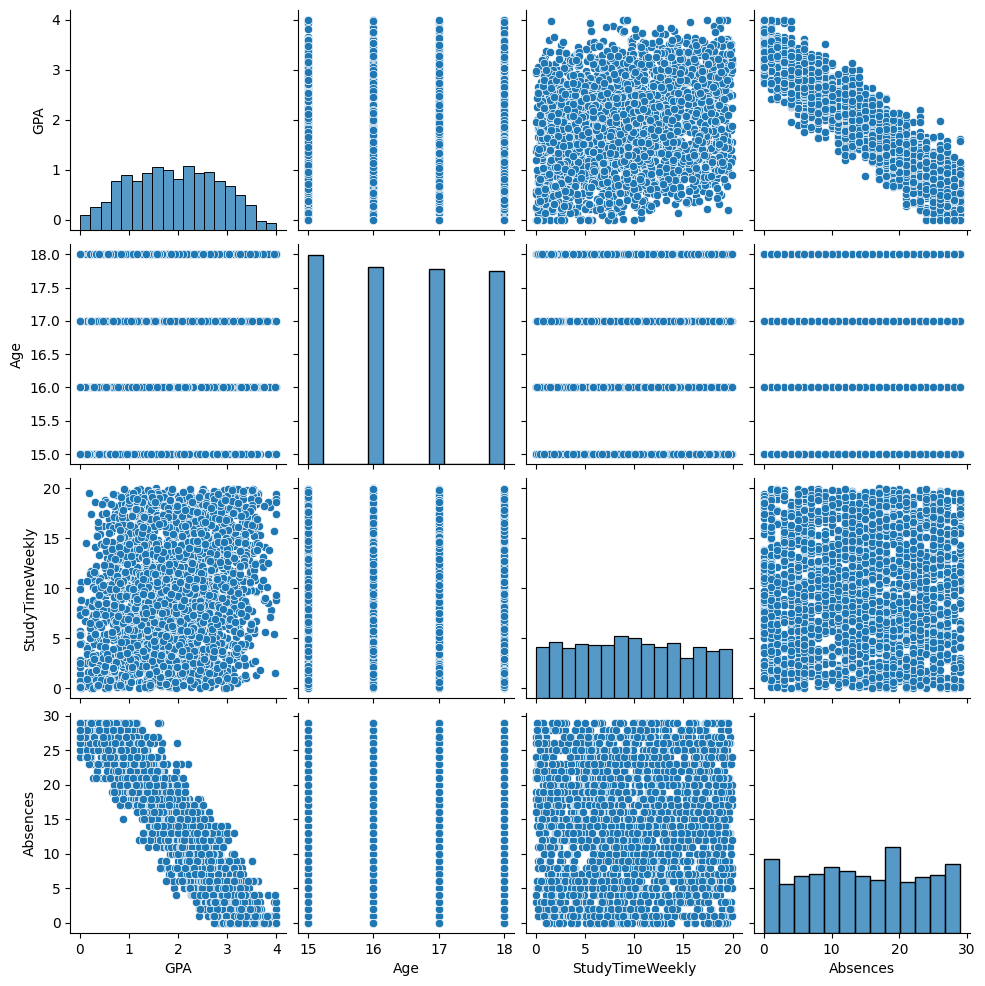

In [10]:
# create plot of pairwise relationships between GPA and nonboolean variables
sns.pairplot(students_nonboolean);

- `GPA` and `Absences` seem to have a negative linear correlation
- contrary to logic, `StudyTimeWeekly` and `GPA` do not seem to have an obvious strong linear correlation
- independent variables do not seem to have multicollinearity based on visually, VIF to double confirm

In [11]:
# perform vif to check multicollinearity
x_vars = students_nonboolean[['Age', 'StudyTimeWeekly', 'Absences']]
vif = [variance_inflation_factor(x_vars.values, i) for i in range(x_vars.shape[1])]
df_vif = pd.DataFrame(vif, index=x_vars.columns, columns=["VIF"])
df_vif

,VIF
Age,6.674954
StudyTimeWeekly,3.931409
Absences,3.889302


- `Age` has a high VIF, so we will exclude it from the model
- since `StudyTimeWeekly` and `Absences` have VIF < 5, we will include both in the model

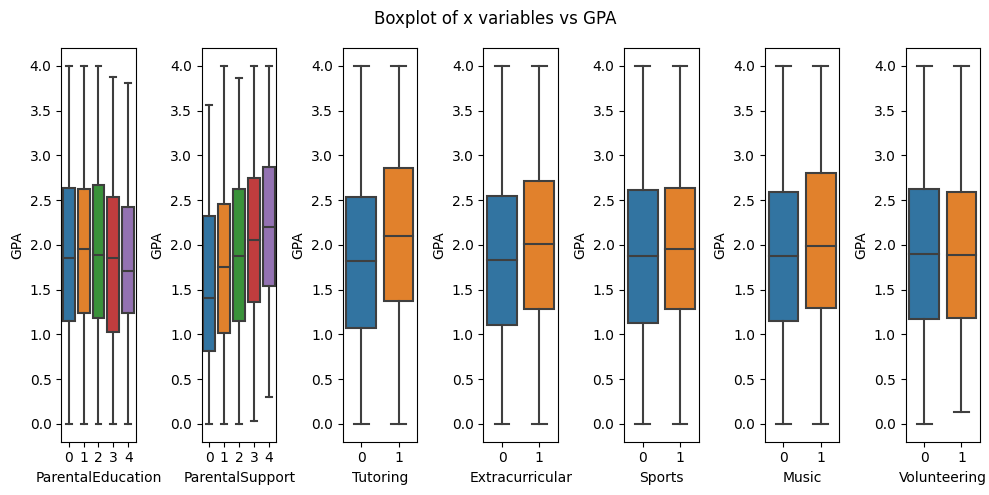

In [12]:
# create boxplot to  check linearity of boolean and encoded variables with GPA visually
x_vars = ['ParentalEducation', 'ParentalSupport', 'Tutoring',  'Extracurricular', 'Sports', 'Music', 'Volunteering']
y_var = 'GPA'

fig, axes = plt.subplots(nrows=1, ncols=len(x_vars), figsize=(10, 5))

for ax, x_var in zip(axes, x_vars):
    sns.boxplot(x=x_var, y=y_var, data=students_booleanenc, ax=ax)

fig.suptitle('Boxplot of x variables vs GPA')
plt.tight_layout()
plt.show()

- boolean values from `Tutoring`, `Extracurricular`, `Sports` and `Music` seem to have positive effects on `GPA`
- label encoded values for `ParentalSupport` seems to have positive linear correlation with `GPA`
- these variables will be included in the model

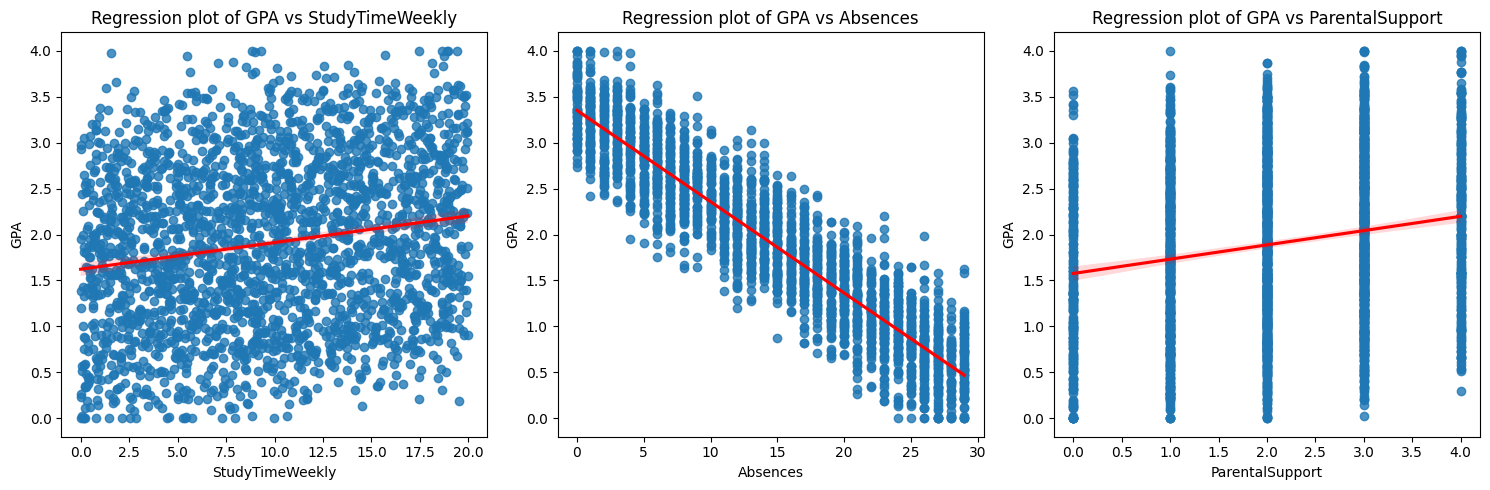

In [16]:
# plot regplots for the chosen non-boolean variables to double check for linearity
x_vars = ['StudyTimeWeekly', 'Absences', 'ParentalSupport']
y_var = 'GPA'

fig, axes = plt.subplots(1, len(x_vars), figsize=(15, 5))

for ax, x_var in zip(axes, x_vars):
    sns.regplot(data=students, x=x_var, y=y_var, ax=ax, line_kws={'color': 'red'})
    ax.set_title(f"Regression plot of {y_var} vs {x_var}")

plt.tight_layout()
plt.show()

- double checking that the linearity assumption is met for GPA vs chosen non-boolean independent variables

<br><br>

## Split dataset into training and testing sets

In [17]:
# train test split 8 : 2
students_train, students_test = train_test_split(students_filtered, train_size=0.8, random_state=42)
print(students_train.shape, students_test.shape, sep = '  |  ')

(1913, 11)  |  (479, 11)


<br><br>

## Train the model

In [18]:
# fit the ols model and retrieve a summary
ols_formula = 'GPA ~ Absences + StudyTimeWeekly + ParentalSupport+ Tutoring + Extracurricular + Music + Sports'
OLS = ols(data=students_train, formula=ols_formula)
model = OLS.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     5649.
Date:                Tue, 09 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:31:40   Log-Likelihood:                 398.70
No. Observations:                1913   AIC:                            -781.4
Df Residuals:                    1905   BIC:                            -737.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5193      0.016    161.981      0.000       2.489       2.550
Absences           -0.0995      0.001   -187.392      0.000      -0.101      -0.098
StudyTimeWeekly     0.0291      0.001     36.775      0.000       0.028       0.031
ParentalSupport     0.1476      0.004     36.624      0.000       0.140       0.156
Tutoring            0.2580      0.010     26.293      0.000       0.239       0.277
Extracurricular     0.1903      0.009     20.502      0.000       0.172       0.208
Music               0.1521      0.011     13.455      0.000       0.130       0.174
Sports              0.1856      0.010     18.965      0.000       0.166       0.205
==============================================================================
Omnibus:                        5.236   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                4.971
Skew:                          -0.088   Prob(JB):                       0.0833
Kurtosis:                       2.824   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared and adj R-squared are very high, signifies that the model is able to explain 95.4% of variation in GPA
- F-statistic is very high, and is statistically significant as p-value < 0.01
- all variables' p-value < 0.05
- overall model seems to be a good fit as of this stage

<br><br>

## Check for normality and homoscedasticity of residuals

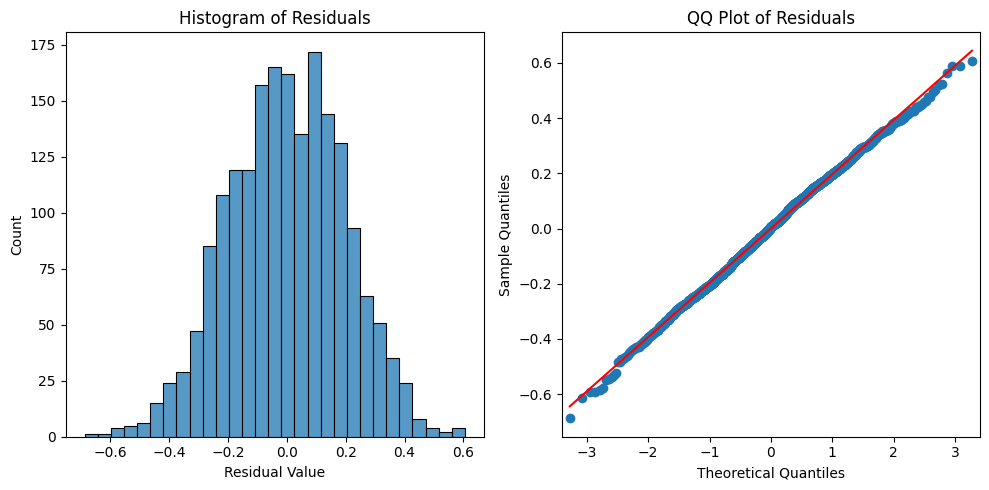

In [19]:
# plot the histogram and qqplot of residuals to verify normality assumption
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(model.resid, ax=axes[0])
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residual Value")

sm.qqplot(model.resid, line='s', ax=axes[1])
axes[1].set_title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

- histogram shows that the residuals seem to be normally distributed
- qq plot shows that the residual data points hug the diagonal line, further supporting normality

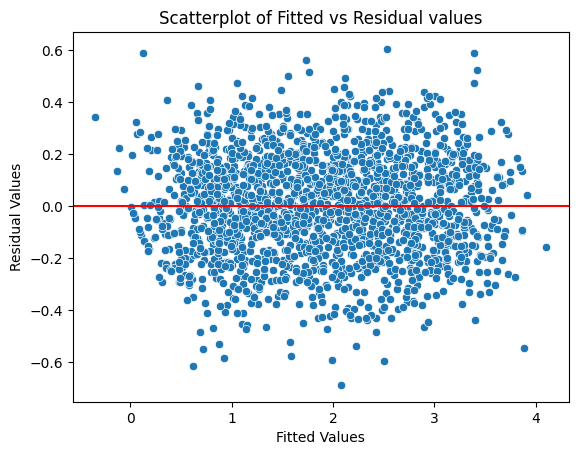

In [20]:
# create a scatterplot of residuals against fitted values to verify homoscedasticity assumption
fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)
fig.axhline(0, color='red')

fig.set_title("Scatterplot of Fitted vs Residual values")
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residual Values")

plt.show()

- data points have a cloud like resemblance and do not follow any explicit patterns
- residuals appear to be randomly spaced
- homoscedasticity assumption seems to be met

<br><br>

## Apply model to testing set

In [21]:
# get the predicted and actual values
gpa_pred = model.predict(students_test)
gpa_actual = students_test['GPA']

In [22]:
# calculate MAE, MSE and R-squared to evaluate model performance
mae = mean_absolute_error(gpa_actual, gpa_pred)
mse = mean_squared_error(gpa_actual, gpa_pred)
r2 = r2_score(gpa_actual, gpa_pred)

# calculate baseline performance with mean of actual values
baseline_pred = np.full_like(gpa_actual, np.mean(gpa_actual))
mae_baseline = mean_absolute_error(gpa_actual, baseline_pred)
mse_baseline = mean_squared_error(gpa_actual, baseline_pred)

# evaluate the results
print(f"Mean Absolute Error: {mae:.2f}" + f"  |  Baseline: {mae_baseline:.2f}")
print(f"Mean Squared Error: {mse:.2f}" + f"  |  Baseline: {mse_baseline:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.16  |  Baseline: 0.77
Mean Squared Error: 0.04  |  Baseline: 0.83
R-squared: 0.95


- the model's MAE and MSE beat the baseline by a substantial amount
- R-squared of 0.95 is very good as it suggests that the model explains 95% of the variance in GPA

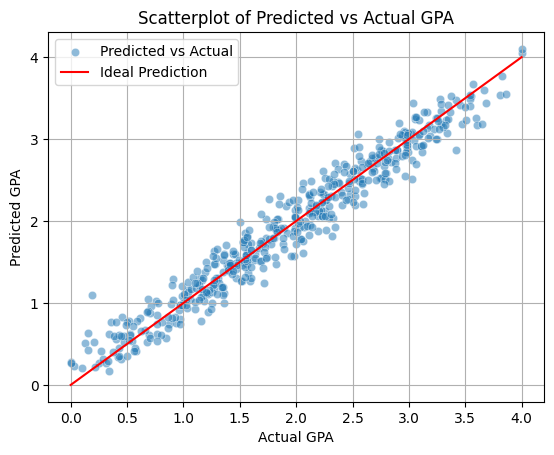

In [23]:
# plot the scatter plot for actual gpa vs predicted gpa
sns.scatterplot(x=gpa_actual, y=gpa_pred, alpha=0.5, label='Predicted vs Actual')

# plot the line plot to show a perfect line where predicted gpa = actual gpa
sns.lineplot(x=[0, 4], y=[0, 4], color='red', label='Ideal Prediction')

plt.title("Scatterplot of Predicted vs Actual GPA")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.grid(True)

plt.show()

- the visual representation also shows no anomolies and that the predicted values are spread out closely along the ideal prediction line

<br><br>

<font color = 'orange'>

## Summary

</font>

- we established a linear relationship between GPA and chosen independent variables
- we fitted a linear regression model to predict GPA, given an input of the x-variables stated above
- the model performed very well on a test dataset that it has not seen previously and was able to accurately predict GPA and beat the baseline

<br><br><br><br>

# Metadata

Student ID
- `StudentID` A unique identifier assigned to each student
<br><br>

Demographic Details
- `Age` The age of the students
- `Gender` Gender of the students

    0. Male
    1. Female

- `Ethnicity` The ethnicity of the students, coded as follows

    0. Caucasian
    1. African American
    2. Asian
    3. Other

- `ParentalEducation`: The education level of the parents, coded as follows
    
    0. None
    1. High School
    2. Some College
    3. Bachelor's
    4. Higher
<br><br>

Study Habits
- `StudyTimeWeekly` Weekly study time in hours, ranging from 0 to 20
- `Absences` Number of absences during the school year, ranging from 0 to 30
- `Tutoring` Tutoring status

    0. No
    1. Yes
<br><br>

Parental Involvement
- `ParentalSupport` The level of parental support, coded as follows

    0. None
    1. Low
    2. Moderate
    3. High
    4. Very High
<br><br>

Extracurricular Activities
- `Extracurricular` Participation in extracurricular activities

    0. No
    1. Yes

- `Sports` Participation in sports

    0. No
    1. Yes

- `Music` Participation in music activities

    0. No
    1. Yes

- `Volunteering` Participation in volunteering

    0. No
    1. Yes
<br><br>

Academic Performance
- `GPA` Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities
<br><br>

Grade Class
- `GradeClass` Classification of students' grades based on GPA

    0. A (GPA >= 3.5)
    1. B (3.0 <= GPA < 3.5)
    2. C (2.5 <= GPA < 3.0)
    3. D (2.0 <= GPA < 2.5)
    4. F (GPA < 2.0)

<br>

# Acknowledgements
* data courtesy, provided via [Students Performance Dataset](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/discussion/513482) on Kaggle